# Demonstration of control of SBIG CCD cameras

In [1]:
# Load the PANOPTES module dir
import sys
sys.path.append('../../')

In [8]:
import astropy.units as u
import os
import glob
import time
from IPython.display import Image

In [4]:
from pocs.camera.sbig import Camera
from pocs.camera.sbigudrv import SBIGDriver
from pocs.focuser.simulator import Focuser
from pocs.scheduler.field import Field
from pocs.scheduler.observation import Observation

In [5]:
c0 = Camera(set_point=0, port='83F011167', focuser='birger', focus_port='/dev/tty.USA49WG2P4.4')

2017-01-23 16:01:56 aaomc48as.aao.gov.au panoptes[317] INFO 			 SBIGDriver initialised: found 1 cameras
2017-01-23 16:02:10 aaomc48as.aao.gov.au panoptes[317] INFO 			 Birger Focuser (10858) on /dev/tty.USA49WG2P4.4 initialised
2017-01-23 16:02:10 aaomc48as.aao.gov.au panoptes[317] INFO 			 SBIG Camera (83F011167) initialised


In [5]:
c0.uid

'83F011167'

In [6]:
c0._info

{'AO8': False,
 'Biorad_TDI_support': False,
 'STXL': False,
 'Truesense': False,
 'bad_columns': [],
 'camera_name': 'SBIG STF-8300 CCD Camera',
 'camera_type': 'STF_CAMERA',
 'colour': False,
 'dump_extra': 0,
 'electronic_shutter': False,
 'firmware_version': '2.45',
 'frame_buffer': True,
 'frame_transfer': False,
 'imaging_ABG': True,
 'mechanical_shutter': True,
 'readout_modes': {'RM_1X1': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 2532.0 pix>,
   'pixel_height': <Quantity 5.4 um>,
   'pixel_width': <Quantity 5.4 um>,
   'width': <Quantity 3352.0 pix>},
  'RM_1X1_VOFFCHIP': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 2532.0 pix>,
   'pixel_height': <Quantity 5.4 um>,
   'pixel_width': <Quantity 5.4 um>,
   'width': <Quantity 3352.0 pix>},
  'RM_2X2': {'gain': <Quantity 0.37 electron / adu>,
   'height': <Quantity 1266.0 pix>,
   'pixel_height': <Quantity 10.8 um>,
   'pixel_width': <Quantity 10.8 um>,
   'width': <Quantity 1676.0 pix>},
 

In [7]:
c0.CCD_cooling_enabled

True

In [8]:
c0.CCD_set_point

<Quantity 0.18901872786513252 deg_C>

In [9]:
c0.CCD_temp

<Quantity -0.23181540522300637 deg_C>

In [10]:
c0.CCD_cooling_power

40.78431372549019

Delete any FITS files from previous runs of this notebook

In [10]:
for fits_name in glob.glob('*.fits'):
    os.unlink(fits_name)

Basic exposure. By default this is non-blocking so sleep for a while to allow it to complete.

In [12]:
c0.take_exposure(1.0, filename='test0.fits')
time.sleep(5)

Basic dark exposure, shutter will be kept closed throughout.

In [13]:
c0.take_exposure(1.0, filename='test1.fits', dark = True)
time.sleep(5)

Take a series of dark exposures one after another using the blocking option

In [14]:
for i in range(2,5):
    c0.take_exposure(0, filename='bias{}.fits'.format(i), dark=True, blocking=True)

Start two dark exposures without waiting for the first to finish. This will generate warnings, but will still work. Don't do this though!

In [15]:
c0.take_exposure(1.0, filename='test5.fits', dark = True)
c0.take_exposure(1.0, filename='test6.fits', dark = True)
time.sleep(10)

2017-01-23 15:40:50 aaomc48as.aao.gov.au panoptes[99823] WARNING Attempt to start exposure on 0 while camera busy!
2017-01-23 15:40:50 aaomc48as.aao.gov.au panoptes[99823] WARNING Waiting for exposure on 0 to complete
2017-01-23 15:40:51 aaomc48as.aao.gov.au panoptes[99823] WARNING Waiting for exposure on 0 to complete


Take an exposure using the higher level `take_observation()` interface. This will also call `process_observation()` on the resulting FITS file.

In [16]:
field = Field('Test Observation', '20h00m43.7135s +22d42m39.0645s')
observation = Observation(field, exp_time=1.5 * u.second)
e0 = c0.take_observation(observation, headers={})

## Focusing test

In [6]:
c0.focuser.move_to(14350)

14350

In [7]:
c0.autofocus(seconds=0.1, focus_range=200, focus_step=10, thumbnail_size=500, plots=True)

2017-01-23 16:04:48 aaomc48as.aao.gov.au panoptes[317] INFO Autofocus plot for camera SBIG Camera (83F011167) written to /Users/ajh/Documents/git/images/focus/83F011167/20170123T050253.png


(14350, 14373)

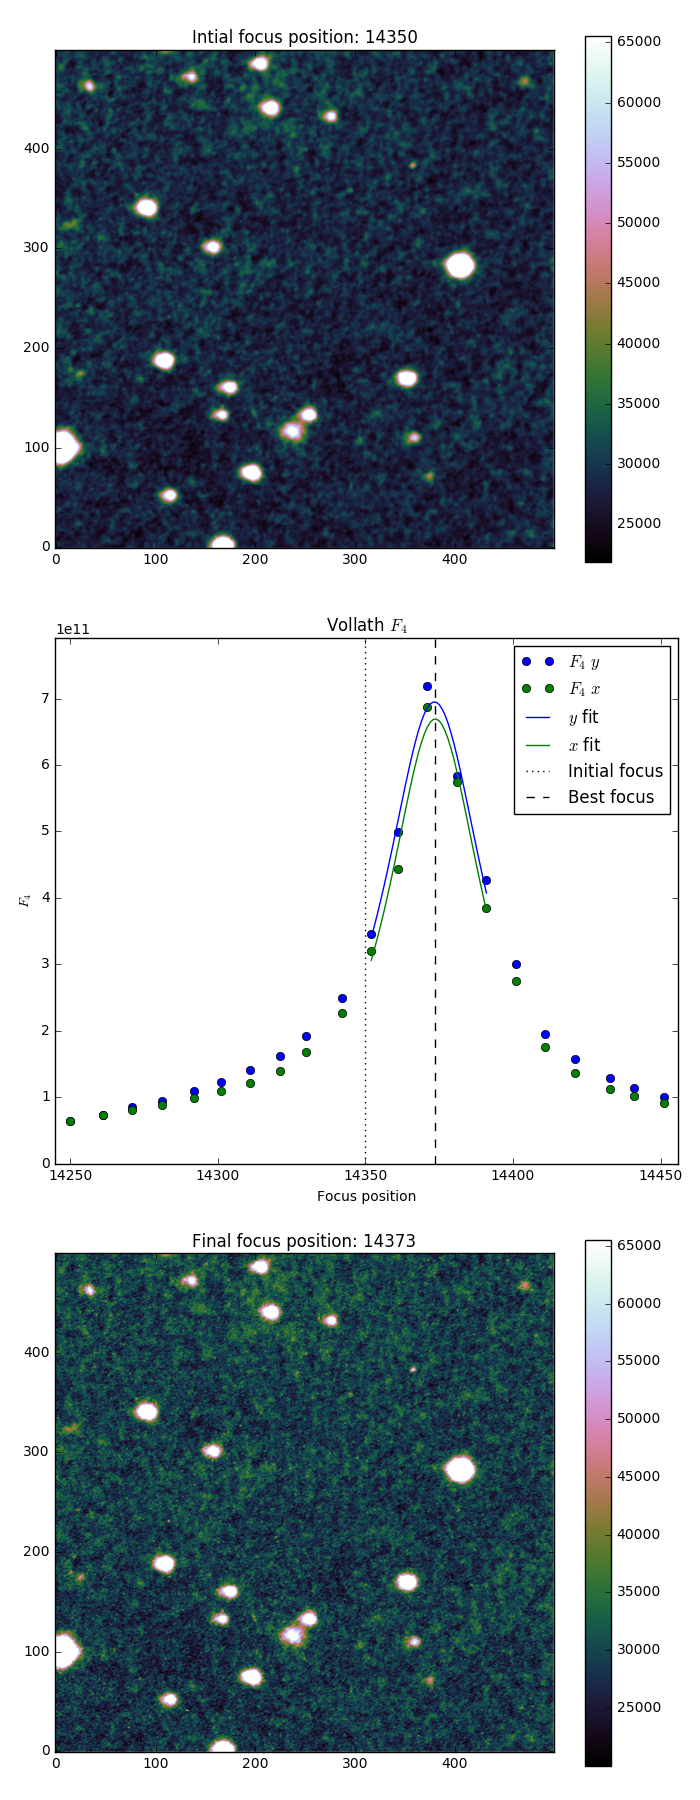

In [9]:
Image('/Users/ajh/Documents/git/images/focus/83F011167/20170123T050253.png')